### **Homework**

In this homework, we will use Bank credit scoring dataset from here: https://www.kaggle.com/datasets/kapturovalexander/bank-credit-scoring/data

Note: sometimes your answer doesn't match one of the options exactly. That's fine. Select the option that's closest to your solution.

Note: we recommend using python 3.10 in this homework.

### **Question 1**

Install Pipenv

What's the version of pipenv you installed?

Use --version to find out

Answer. pipenv --version from conda prompt

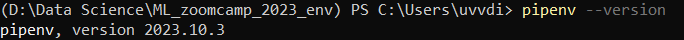

**pipenv, version 2023.10.3**

### **Question 2**

Use Pipenv to install Scikit-Learn version 1.3.1

What's the first hash for scikit-learn you get in Pipfile.lock?

Note: you should create an empty folder for homework and do it there.

**Answer: "sha256:0c275a06c5190c5ce00af0acbb61c06374087949f643ef32d355ece12c4db043"**

Models
We've prepared a dictionary vectorizer and a model.

They were trained (roughly) using this code:

features = ['job','duration', 'poutcome']
dicts = df[features].to_dict(orient='records')

dv = DictVectorizer(sparse=False)
X = dv.fit_transform(dicts)

model = LogisticRegression().fit(X, y)
Note: You don't need to train the model. This code is just for your reference.


ith wget:

PREFIX=https://raw.githubusercontent.com/DataTalksClub/machine-learning-zoomcamp/master/cohorts/2023/05-deployment/homework
wget $PREFIX/model1.bin
wget $PREFIX/dv.bin

### **Question 3**
Let's use these models!

Write a script for loading these models with pickle
Score this client:
{"job": "retired", "duration": 445, "poutcome": "success"}

What's the probability that this client will get a credit?
- 0.162
- 0.392
- 0.652
- 0.902

If you're getting errors when unpickling the files, check their checksum:

$ md5sum model1.bin dv.bin
3f57f3ebfdf57a9e1368dcd0f28a4a14  model1.bin
6b7cded86a52af7e81859647fa3a5c2e  dv.bin

Files downloaded using WGET from WSL cmd

Code in q3.py

Run from pipenv

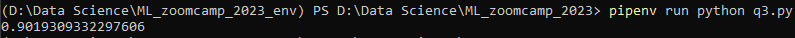

**Answer: 0.902**

### **Question 4**

Now let's serve this model as a web service

1. Install Flask and gunicorn (or waitress, if you're on Windows)
2. Write Flask code for serving the model
3. Now score this client using requests: 
url = "YOUR_URL"
client = {"job": "unknown", "duration": 270, "poutcome": "failure"}
requests.post(url, json=client).json()

What's the probability that this client will get a credit?
- 0.140
- 0.440
- 0.645
- 0.845

Answer:

1. Install Flask and gunicorn (or waitress, if you're on Windows): *pipenv install flask waitress*
2. Code in q4_predict.py and q4_request.py
3. **0.140**

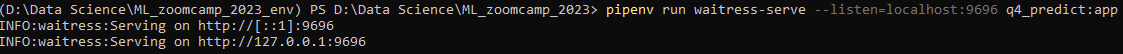

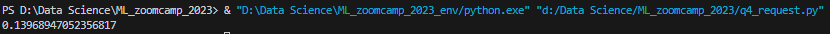


### **Docker**

Install Docker. We will use it for the next two questions.

For these questions, we prepared a base image: svizor/zoomcamp-model:3.10.12-slim. You'll need to use it (see Question 5 for an example).

This image is based on python:3.10.12-slim and has a logistic regression model (a different one) as well a dictionary vectorizer inside.

This is how the Dockerfile for this image looks like:

FROM python:3.10.12-slim

WORKDIR /app

COPY ["model2.bin", "dv.bin", "./"]

We already built it and then pushed it to svizor/zoomcamp-model:3.10.12-slim.

Note: You don't need to build this docker image, it's just for your reference.

### **Question 5**

Download the base image svizor/zoomcamp-model:3.10.12-slim. You can easily make it by using docker pull command.

So what's the size of this base image?
- 47 MB
- 147 MB
- 374 MB
- 574 MB

You can get this information when running docker images - it'll be in the "SIZE" column.

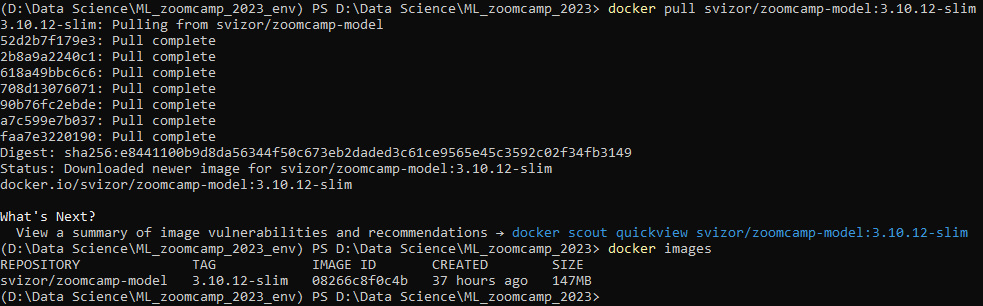

**Answer: 147 MB**

Dockerfile

Now create your own Dockerfile based on the image we prepared.

It should start like that:

FROM svizor/zoomcamp-model:3.10.12-slim

\# add your stuff here

Now complete it:
1. Install all the dependencies form the Pipenv file
2. Copy your Flask script
3. Run it with Gunicorn
4. After that, you can build your docker image.

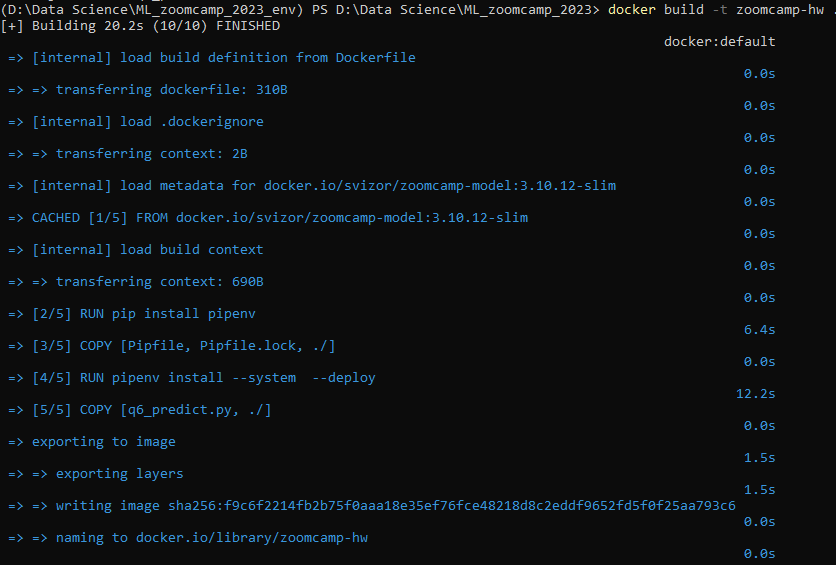

### **Question 6**

Let's run your docker container!

After running it, score this client once again:
- url = "YOUR_URL"
- client = {"job": "retired", "duration": 445, "poutcome": "success"}
- requests.post(url, json=client).json()

What's the probability that this client will get a credit now?
- 0.168
- 0.530
- 0.730
- 0.968

*Running docker container*

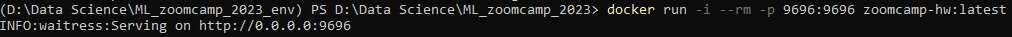

**Answer: 0.730**

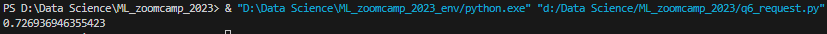